Freq_domain_meas
=================

* **[Cavity search](#Cavity-search)** 
Search the location of the cavity with $sweeping$ $LO$ $frequency$ due to large frequency range (e.g. $5.0$ - $7.0$ GHz)

(Frequency range needs to be a `float` number

* **[Accurate Cavity search](#Accurate-Cavity-search)**
Search the location of the cavity with $sweeping$ $NCO$ $frequency$ due to small frequency range (e.g. $6.0$ - $6.04$ GHz)


* **[Power dependent cavity](#Power-dependent-cavity)** 
Search the location of the dress state cavity with $sweeping$ $NCO$ $frequency$ due to small frequency range (e.g. $6.0$ - $6.004$ GHz)

* **[Flux dependent cavity](#Flux-dependent-cavity)** 

* **[Two-tone](#Two-tone)** 


To run this, you will need:
* [QRM-RF](https://qblox-qblox-instruments.readthedocs-hosted.com/en/master/cluster/qcm_rf.html)
* Device under test: a Superconducting Qubit
* Two SMA-cables
* Installation and enabling of ipywidgets


Cluster Setup
-----

In [14]:
from aux import *
from numpy import arange, linspace, logspace
meas_datadir = './Data/5Qidle'
dh.set_datadir(meas_datadir)
# Connect to Cluster
warnings.simplefilter("ignore")
connect, ip = connect_clusters()



Dropdown(description='Select Device', options=(('Marketing-Cluster @192.168.1.170', '00015_2247_002'),), value…

In [2]:
Instrument.close_all()              # Close all existing QCoDeS Instrument instances
dev_id = connect.value
cluster = Cluster(name = "cluster0", identifier = ip.get(dev_id))
print(f"{connect.label} connected")

# Reset the cluster
cluster.reset()        
print(cluster.get_system_state())
# Hardware settings
hardware_cfg = {
    "backend": "quantify_scheduler.backends.qblox_backend.hardware_compile",
    "cluster0": {
        "sequence_to_file": False,  # Boolean flag which dumps waveforms and program dict to JSON file
        "ref": "internal",  # Use shared clock reference of the cluster
        "instrument_type": "Cluster",
        # ============ DRIVE ============#
        "cluster0_module4": {
            "instrument_type": "QCM_RF",
            "complex_output_0": {
                "output_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "portclock_configs": [
                    {
                        "port": "q1:mw",
                        "clock": "q1.01",
                        "interm_freq": 80e6,
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    }
                ],
            },
            "complex_output_1": {
                "output_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "portclock_configs": [
                    {
                        "port": "q2:mw",
                        "clock": "q2.01",
                        "interm_freq": 80e6,
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    }
                ],
            },
        },
        "cluster0_module6": {
            "instrument_type": "QCM_RF",
            "complex_output_0": {
                "output_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "portclock_configs": [
                    {
                        "port": "q3:mw",
                        "clock": "q3.01",
                        "interm_freq": 80e6,
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    }
                ],
            },
            "complex_output_1": {
                "output_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "portclock_configs": [
                    {
                        "port": "q4:mw",
                        "clock": "q4.01",
                        "interm_freq": 80e6,
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    }
                ],
            },
        },
        "cluster0_module12": {
            "instrument_type": "QCM_RF",
            "complex_output_0": {
                "output_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "portclock_configs": [
                    {
                        "port": "q5:mw",
                        "clock": "q5.01",
                        "interm_freq": 80e6,
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    }
                ],
            },
        },
        # ============ FLUX ============#
        "cluster0_module2": {
            "instrument_type": "QCM",
            "real_output_0": {"portclock_configs": [{"port": "q1:fl", "clock": "cl0.baseband"}]},
            "real_output_1": {"portclock_configs": [{"port": "q2:fl", "clock": "cl0.baseband"}]},
            "real_output_2": {"portclock_configs": [{"port": "q3:fl", "clock": "cl0.baseband"}]},
            "real_output_3": {"portclock_configs": [{"port": "q4:fl", "clock": "cl0.baseband"}]},
        },
        "cluster0_module10": {
            "instrument_type": "QCM",
            "real_output_0": {"portclock_configs": [{"port": "q5:fl", "clock": "cl0.baseband"}]},
        },
        # ============ READOUT ============#
        "cluster0_module8": {
            "instrument_type": "QRM_RF",
            "complex_output_0": {
                "output_att": 0,
                "input_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "lo_freq": 5.95e9,       # *** Should be set as a parameter later on
                "portclock_configs": [
                    {
                        "port": "q1:res",
                        "clock": "q1.ro",
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    },
                    {
                        "port": "q2:res",
                        "clock": "q2.ro",
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    },
                    {
                        "port": "q3:res",
                        "clock": "q3.ro",
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    },
                    {
                        "port": "q4:res",
                        "clock": "q4.ro",
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    },
                    {
                        "port": "q5:res",
                        "clock": "q5.ro",
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    },
                ],
            },
        },
    },
}

# quantum device, measctrler, coordinator set up 
quantum_device = create_quantum_device(hardware_cfg, num_qubits=5)
meas_ctrl, instrument_coordinator = configure_measurement_control_loop(quantum_device, cluster)

# Flux bias setting
flux_settable_amp: callable = {
    "q1":cluster.module2.out0_offset,
    "q2":cluster.module2.out1_offset,
    "q3":cluster.module2.out2_offset,
    "q4":cluster.module2.out3_offset,
    "q5":cluster.module10.out0_offset
}
# default the offset in circuit
for i in flux_settable_amp:
    flux_settable_amp[i](0.0)


# Activate NCO delay compensation
for i in range(6):
    getattr(cluster.module8, f"sequencer{i}").nco_prop_delay_comp_en(True)
    getattr(cluster.module8, f"sequencer{i}").nco_prop_delay_comp(50)




Marketing-Cluster @192.168.1.170 connected
Status: OKAY, Flags: NONE, Slot flags: NONE


In [22]:
# Attenuation setting. We don't change it once we set it.
ro_out_att = 20
xy_out_att = 10
# atte. setting
set_atte_for(quantum_device,ro_out_att,'ro',list(flux_settable_amp.keys()))
set_atte_for(quantum_device,xy_out_att,'xy',list(flux_settable_amp.keys()))

In [6]:
# Some designed value 
estimate_f_resonator = dict(
    q1 = 5.72035 * 1e9,
    q2 = 6.0085 * 1e9,
    q3 = 5.83875 * 1e9,
    q4 = 6.1073 * 1e9,
    q5 = 5.9139 * 1e9,
)
estimate_f_qubits = dict(
    q1 = 4.116883353122914 * 1e9,
    q2 = 4.232816338702908 * 1e9,
    q3 = 3.8418045414828643 * 1e9,
    q4 = 4.022 * 1e9,
    q5 = 2.5738611635902258 * 1e9,
)

Accurate Cavity search
-------------

After fixing the approximate resonator frequencies, 
sweeping NCO frequency to get the location frequency of all cavities, 
the frequency you get will be the accurate $bare$ $state$ $frequency$.

This can also check the $dress$ $state$ $frequency$ by changing **ro_out_att** value.

In [11]:
ro_element = list(flux_settable_amp.keys())
def CavitySearch(quantum_device:QuantumDevice,ro_elements:list,estimation:dict,ro_span_Hz:int,n_avg:int=1000,fitpoint:int=200)->(dict,dict):
    analysis_result = {}
    for q in ro_elements:
        rof_center = estimation[q]
        qubit = quantum_device.get_element(q)
        rof_samples = linspace(rof_center-ro_span_Hz,rof_center+ro_span_Hz,fitpoint)

        # declare variables
        freq = ManualParameter(name="freq", unit="Hz", label="Frequency")
        freq.batched = True
        freq.batch_size = 100

        # requisition
        spec_sched_kwargs = dict(    # *** Try to draw the prospective wave as a plot for a great check of the outputting pulse. And turn them into parameters
            pulse_amp=0.1,           # *** Check the unit of amplitude, only scale or volt # Can be set as a parameter
            pulse_duration=2e-6,     # *** Can be set as a parameter
            frequencies=freq,
            acquisition_delay=80e-9,# *** Can be set as a parameter
            integration_time=1.5e-6,   # *** Can be set as a parameter
            port=qubit.ports.readout(),
            clock=qubit.name + ".ro",
            init_duration=10e-6,     # *** Can be set as a parameter
        )
        gettable = ScheduleGettable(
            quantum_device,
            schedule_function=heterodyne_spec_sched_nco,  # *** Def: https://quantify-os.org/docs/quantify-scheduler/dev/autoapi/quantify_scheduler/schedules/index.html
            schedule_kwargs=spec_sched_kwargs,
            real_imag=False,
            batched=True,
        )
        show_args(spec_sched_kwargs, title="spec_sched_kwargs")  # *** Try to insert this into interfaces

        # send the requisition to MeasurementControl-er
        quantum_device.cfg_sched_repetitions(n_avg)
        meas_ctrl.gettables(gettable)
        meas_ctrl.settables(freq)
        meas_ctrl.setpoints(rof_samples)

        # MeasurementControl-er start measurement by the requisition
        rs_ds = meas_ctrl.run("resonator spectroscopy")
        rs_ds

        # Analysis
        analysis_result[q] = ResonatorSpectroscopyAnalysis(tuid=rs_ds.attrs["tuid"], dataset=rs_ds)
        print(f"{q} Cavity:")
        # feedback
        # qubit.clock_freqs.readout(analysis_result[q].quantities_of_interest['fr'].nominal_value)
    return analysis_result, spec_sched_kwargs

CS_results, spec = CavitySearch(quantum_device,ro_element,estimate_f_resonator,10e6)

spec_sched_kwargs
pulse_amp         = 0.1
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
port              = q1:res
clock             = q1.ro
init_duration     = 1e-05
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

q1 Cavity:
spec_sched_kwargs
pulse_amp         = 0.1
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
port              = q2:res
clock             = q2.ro
init_duration     = 1e-05
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

q2 Cavity:
spec_sched_kwargs
pulse_amp         = 0.1
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
port              = q3:res
clock             = q3.ro
init_duration     = 1e-05
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

q3 Cavity:
spec_sched_kwargs
pulse_amp         = 0.1
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
port              = q4:res
clock             = q4.ro
init_duration     = 1e-05
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

q4 Cavity:
spec_sched_kwargs
pulse_amp         = 0.1
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
port              = q5:res
clock             = q5.ro
init_duration     = 1e-05
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

q5 Cavity:


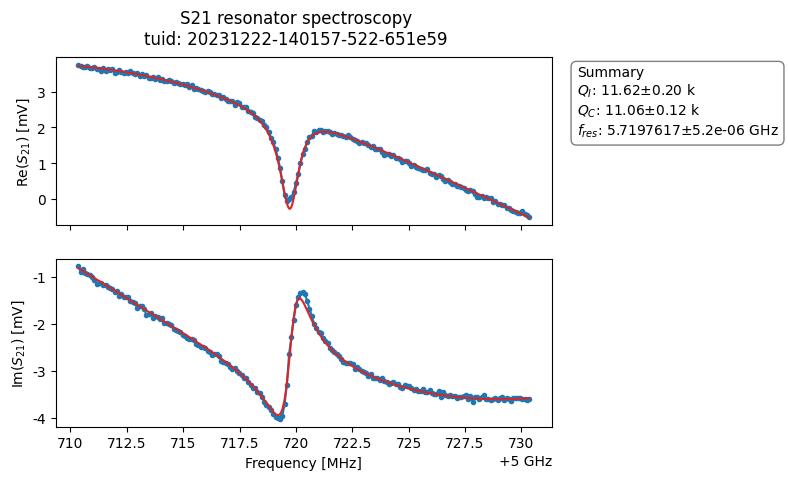

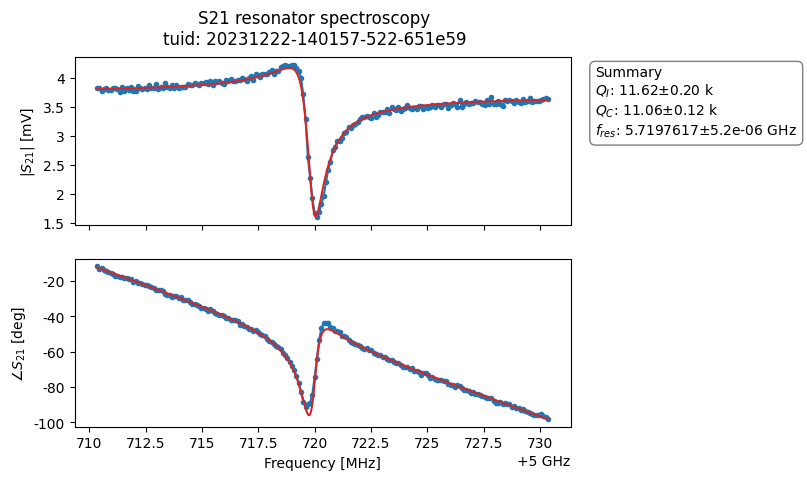

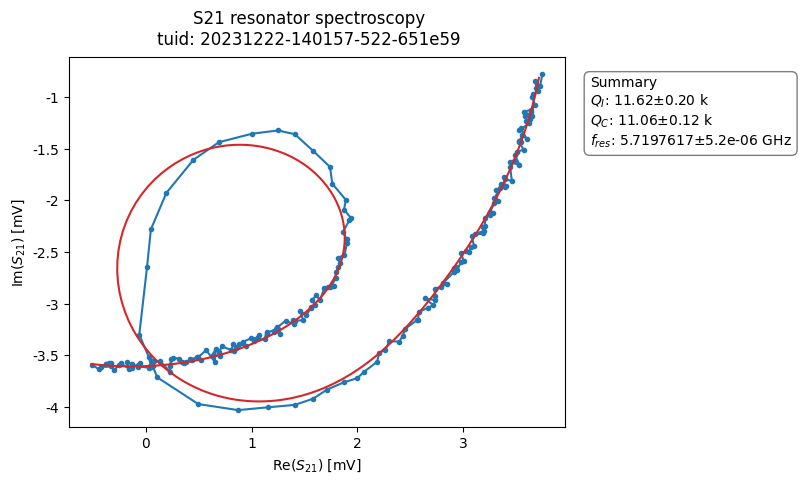

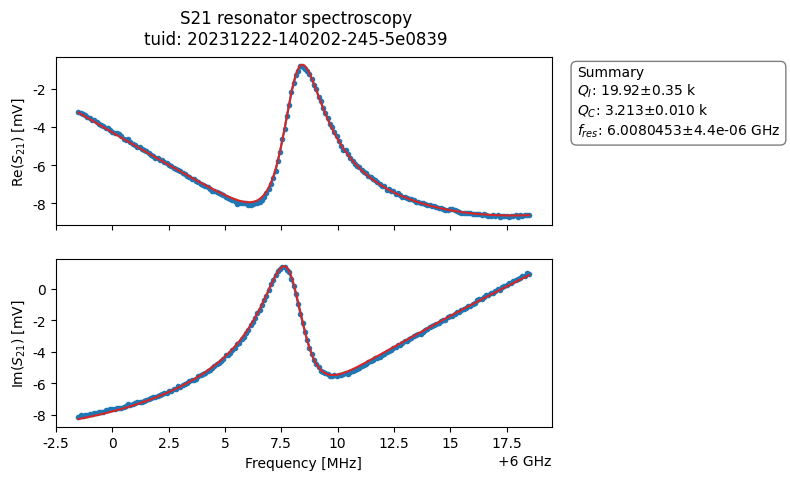

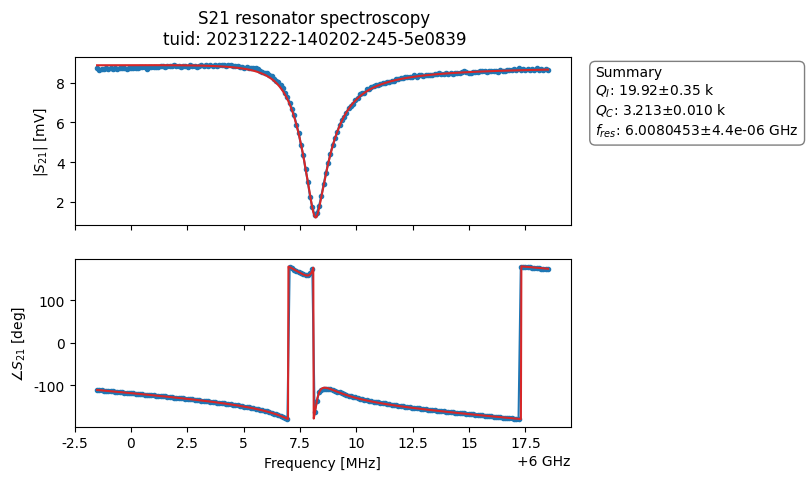

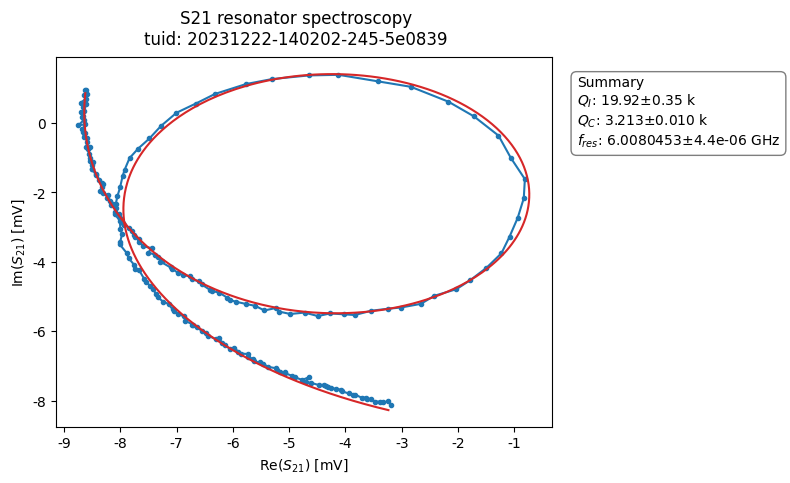

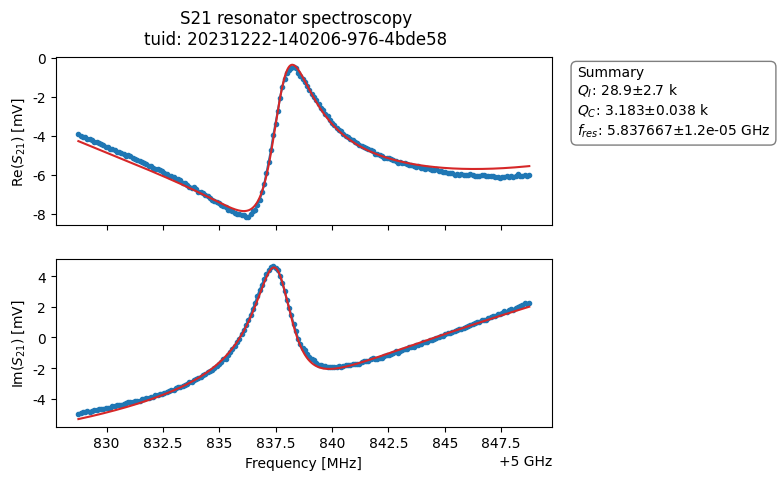

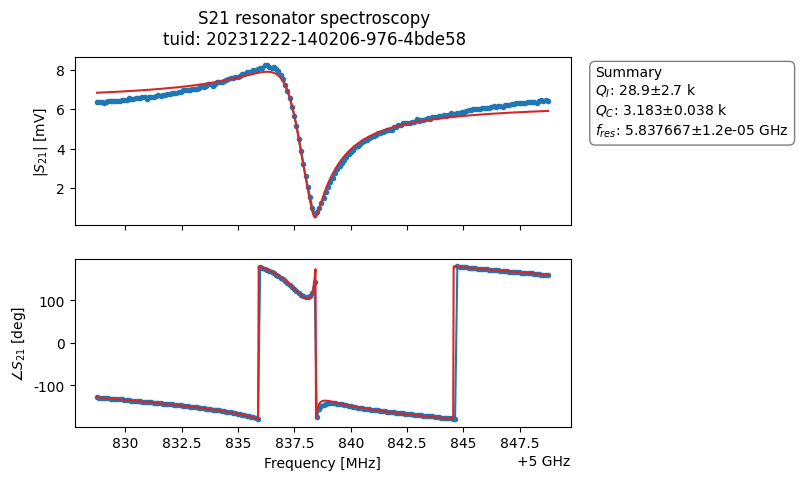

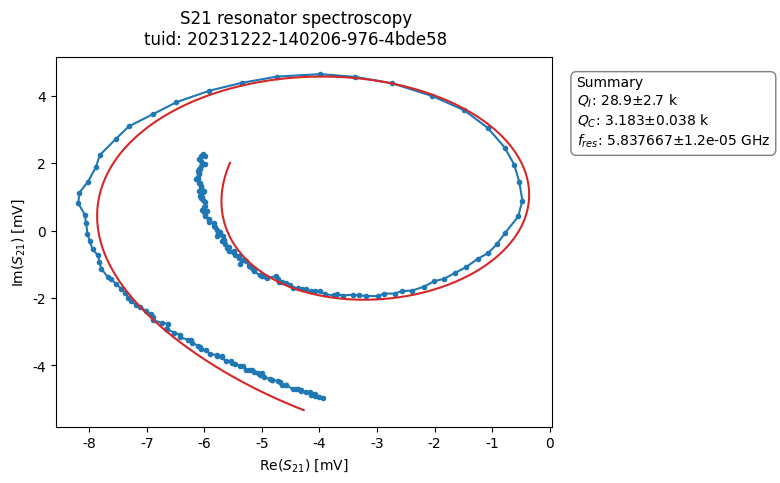

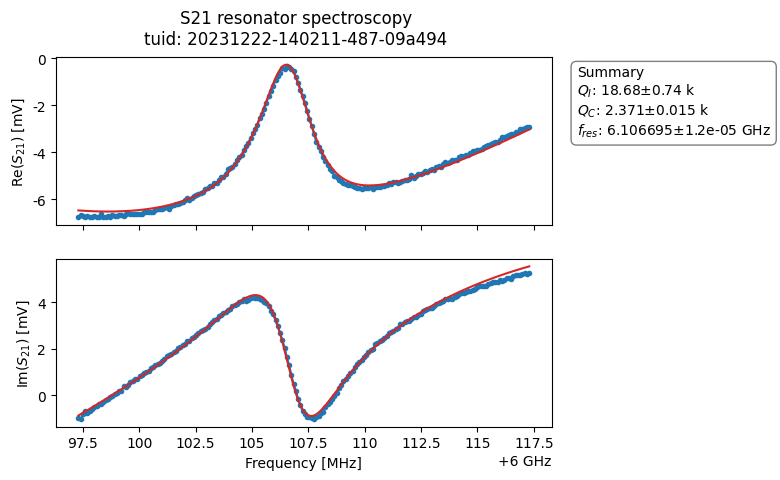

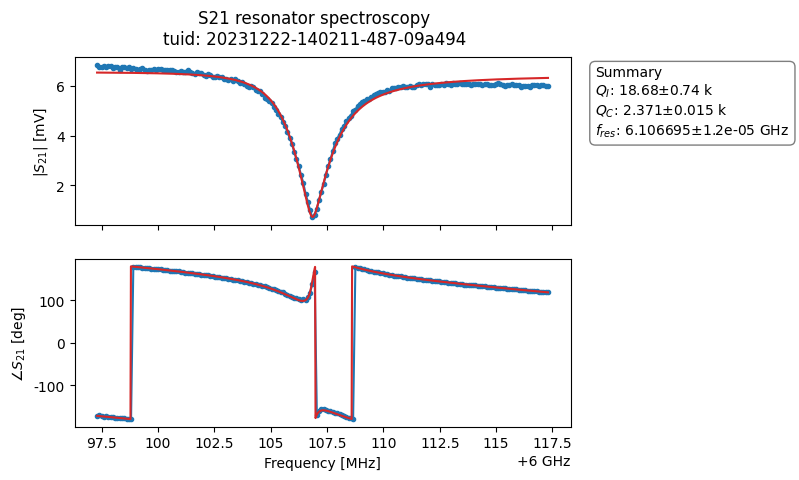

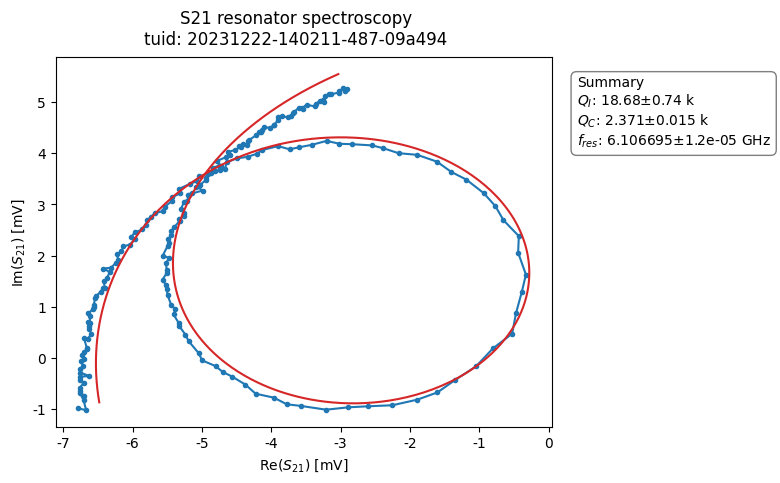

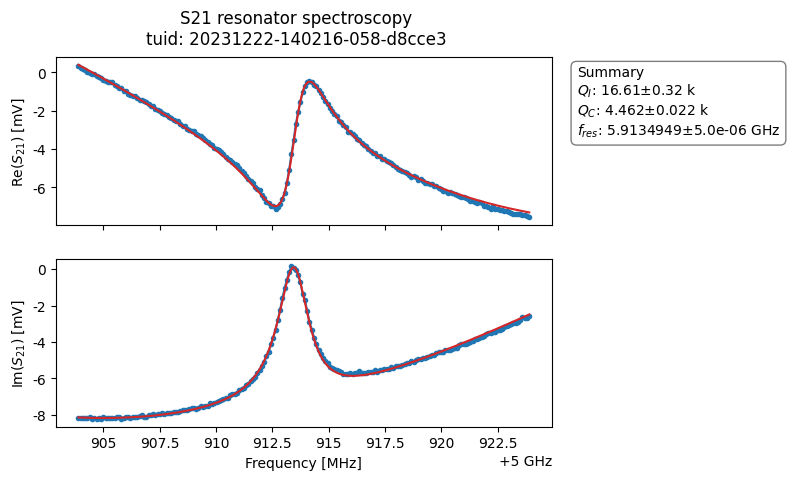

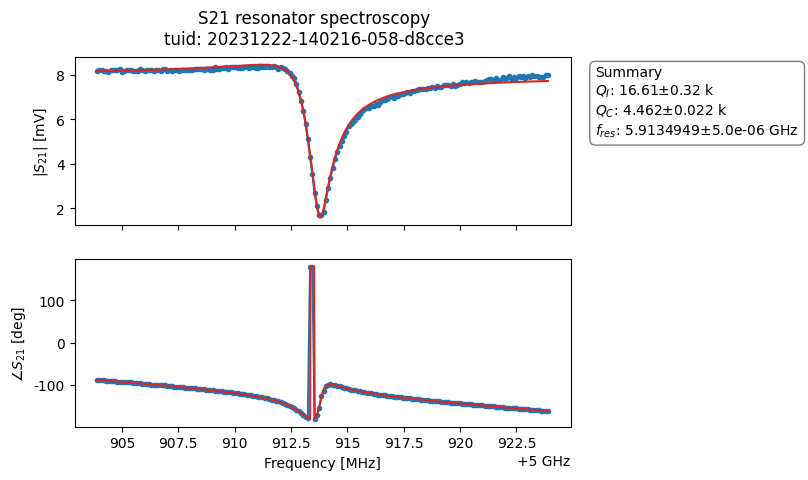

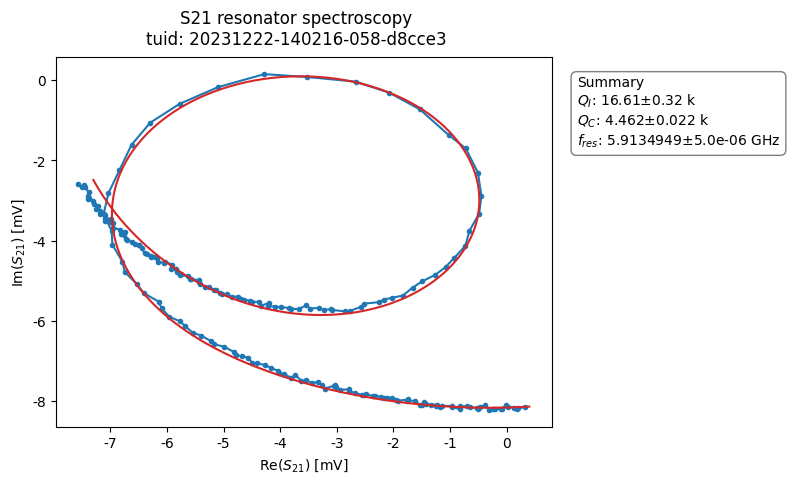

q1.measure
pulse_type                = SquarePulse
pulse_amp                 = 0.1
pulse_duration            = 2e-06
acq_channel               = 1
acq_delay                 = 8e-08
integration_time          = 1.5e-06
reset_clock_phase         = True
acq_weights_a             = None
acq_weights_b             = None
acq_weights_sampling_rate = None
acq_weight_type           = SSB
acq_rotation              = 0
acq_threshold             = 0

q1.reset
duration = 0.0001

q1.clock_freqs
readout = 5719761686.149905
q2.measure
pulse_type                = SquarePulse
pulse_amp                 = 0.1
pulse_duration            = 2e-06
acq_channel               = 2
acq_delay                 = 8e-08
integration_time          = 1.5e-06
reset_clock_phase         = True
acq_weights_a             = None
acq_weights_b             = None
acq_weights_sampling_rate = None
acq_weight_type           = SSB
acq_rotation              = 0
acq_threshold             = 0

q2.reset
duration = 0.0001

q2.clock_freqs
re

In [13]:
for q in CS_results:
    CS_results[q].run().display_figs_mpl()

# fill up the spec for qubit like reset-time, ROL, ROW, ROF...
executor = True
if executor:
    for q in CS_results:
        qubit = quantum_device.get_element(q)
        qubit.reset.duration(100e-6)
        qubit.measure.acq_delay(spec["acquisition_delay"])
        qubit.measure.pulse_amp(spec["pulse_amp"])
        qubit.measure.pulse_duration(spec["pulse_duration"])
        qubit.measure.integration_time(spec["integration_time"])
        qubit.clock_freqs.readout(CS_results[q].quantities_of_interest["fr"].nominal_value)
        show_readout_args(qubit)
    executor = False

Power dependent cavity
------------------------

Sweeping NCO frequency to get the location dress state frequency of each cavity found in cavity search, with 2D plot we can get the $intensity$ $of$ $the$ $signal$ and $dress$ $state$ $frequency$

The Q1ASM sequencer program only supports integer values. However, the NCO has a frequency resolution of 0.25 Hz. As such, the frequency values in the sequencer program must be given as integer multiples of $1/4$ Hz.

In [23]:
def PowerDep(quantum_device:QuantumDevice,ro_elements:list,ro_span_Hz:int=2e6,n_avg:int=1000,rol_point:int=20,rof_point:int=20,max_rol:float=0.7)->dict:
    analysis_result = {}
    for q in ro_elements:
        qubit = quantum_device.get_element(q)
        rof_center = qubit.clock_freqs.readout()  # Range ~4MHz
        rof_samples = linspace(rof_center-ro_span_Hz,rof_center+ro_span_Hz,rof_point)
        rol_samples = linspace(0.01,max_rol,rol_point)

        # declare variables
        freq = ManualParameter(name="freq", unit="Hz", label="Frequency")
        freq.batched = True

        ro_pulse_amp = ManualParameter(name="ro_pulse_amp", unit="", label="Readout pulse amplitude")
        ro_pulse_amp.batched = False
        # Two axis need two ManualParameters

        # Requisition
        spec_sched_kwargs = dict(
            pulse_amp=ro_pulse_amp,
            pulse_duration=qubit.measure.pulse_duration(),
            frequencies=freq,
            acquisition_delay=qubit.measure.acq_delay(),
            integration_time=qubit.measure.integration_time(),
            init_duration=10e-6, # only cavity shorter is enough
            port=qubit.ports.readout(),
            clock=qubit.name + ".ro",
        )
        gettable = ScheduleGettable(
            quantum_device,
            schedule_function=heterodyne_spec_sched_nco,
            schedule_kwargs=spec_sched_kwargs,
            real_imag=False,
            batched=True,
        )
        show_args(spec_sched_kwargs, title="spec_sched_kwargs")

        # send the requisition to MeasurementControl-er
        quantum_device.cfg_sched_repetitions(n_avg)
        meas_ctrl.gettables(gettable)
        meas_ctrl.settables([freq, ro_pulse_amp])
        meas_ctrl.setpoints_grid((rof_samples, rol_samples))

        # MeasurementControl-er start measurement by the requisition
        punchout_ds = meas_ctrl.run("resonator punchout")
        punchout_ds

        # analysis
        analysis_result[q] = Basic2DAnalysis(tuid=punchout_ds.attrs["tuid"], dataset=punchout_ds)

        # TODO: feedback 
    return analysis_result

PD_results = PowerDep(quantum_device,ro_element,rol_point=30,rof_point=30)


spec_sched_kwargs
pulse_amp         = ro_pulse_amp
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 1e-05
port              = q1:res
clock             = q1.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 ro_pulse_amp 
Batched settable(s):
	 freq 
Batch size limit: 900



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = ro_pulse_amp
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 1e-05
port              = q2:res
clock             = q2.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 ro_pulse_amp 
Batched settable(s):
	 freq 
Batch size limit: 900



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = ro_pulse_amp
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 1e-05
port              = q3:res
clock             = q3.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 ro_pulse_amp 
Batched settable(s):
	 freq 
Batch size limit: 900



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = ro_pulse_amp
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 1e-05
port              = q4:res
clock             = q4.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 ro_pulse_amp 
Batched settable(s):
	 freq 
Batch size limit: 900



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = ro_pulse_amp
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 1e-05
port              = q5:res
clock             = q5.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 ro_pulse_amp 
Batched settable(s):
	 freq 
Batch size limit: 900



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

q1:


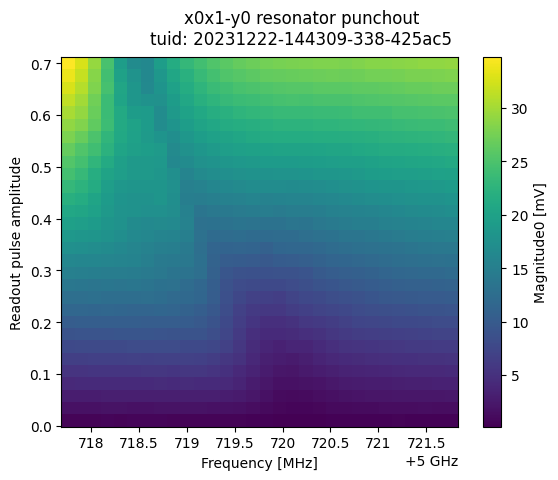

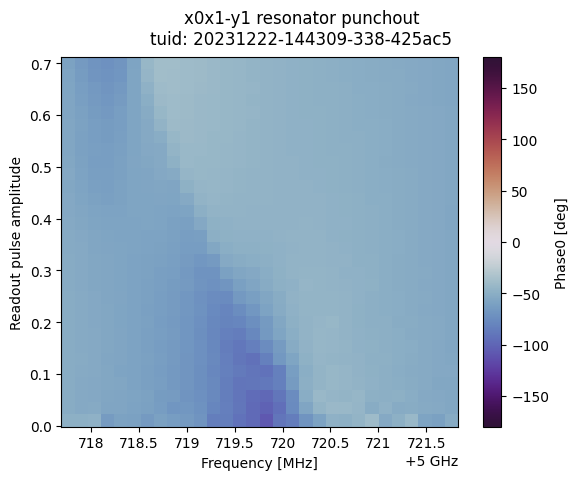

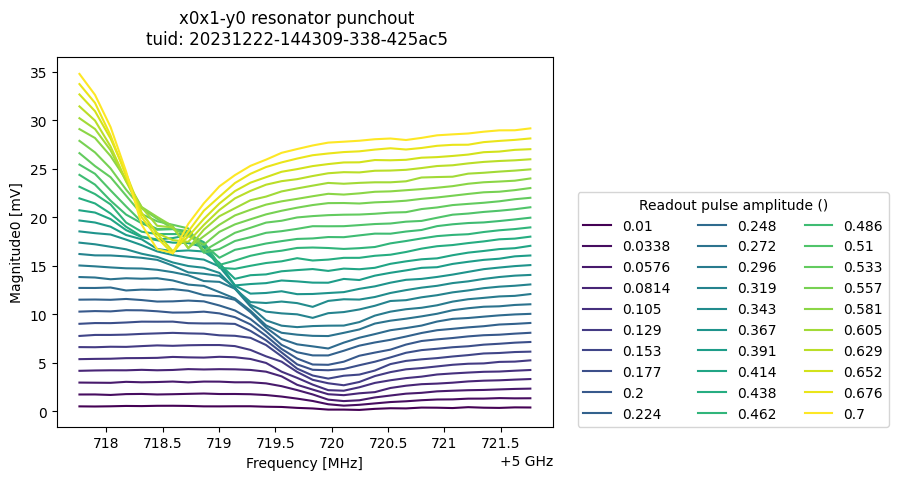

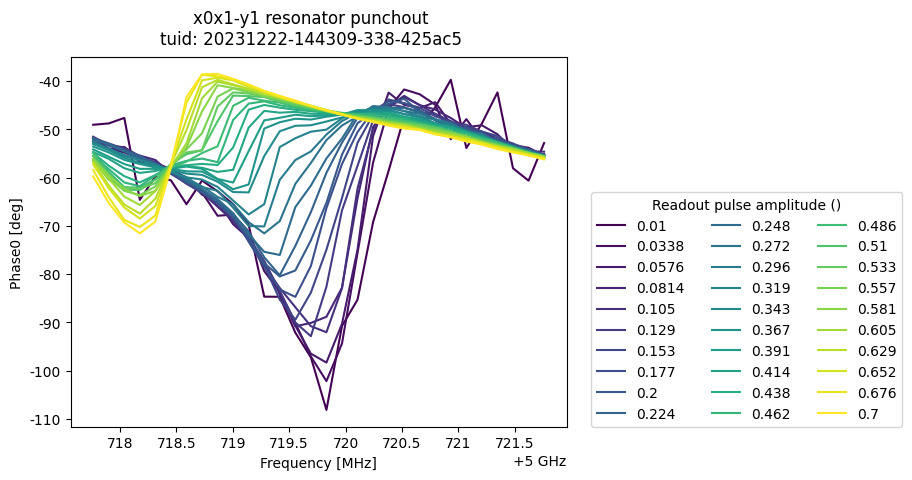

q2:


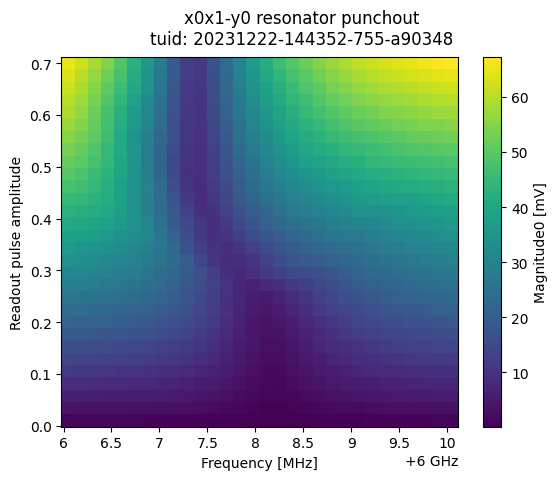

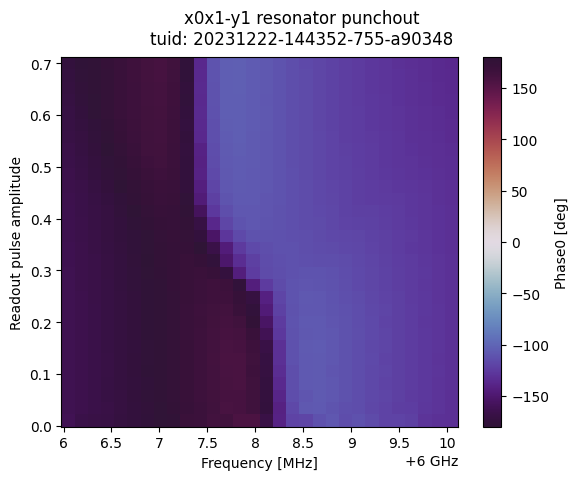

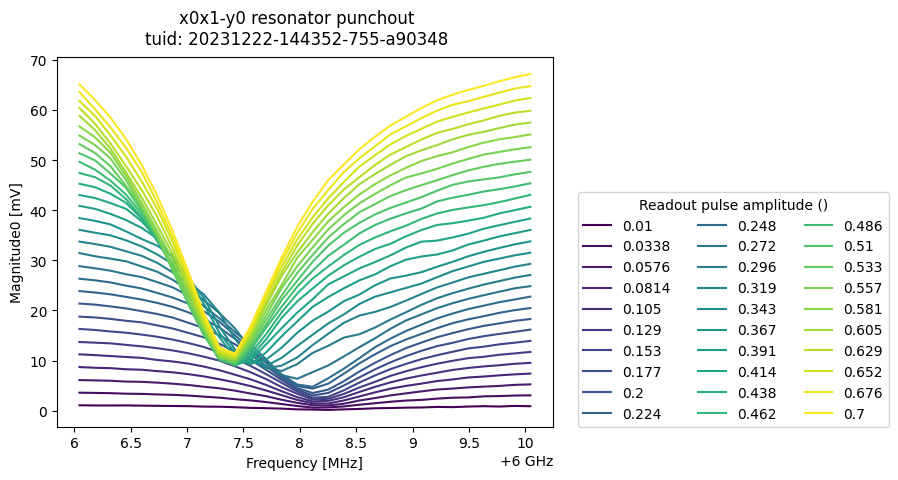

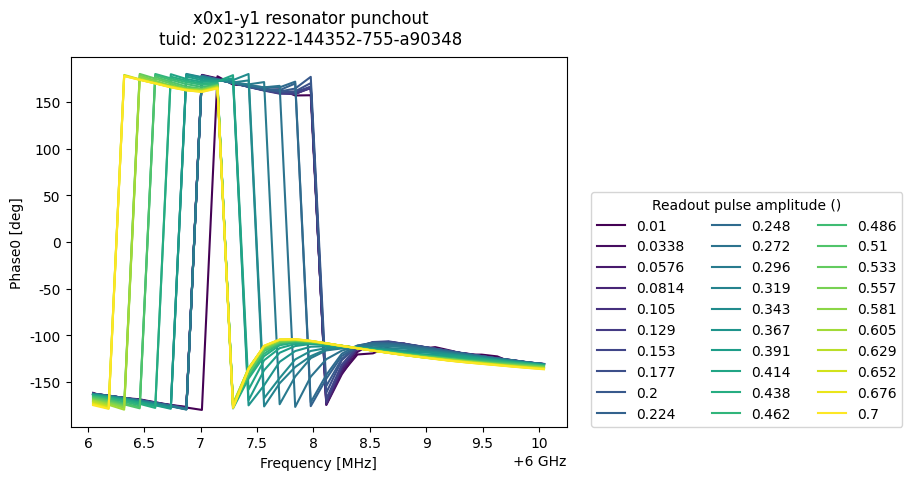

q3:


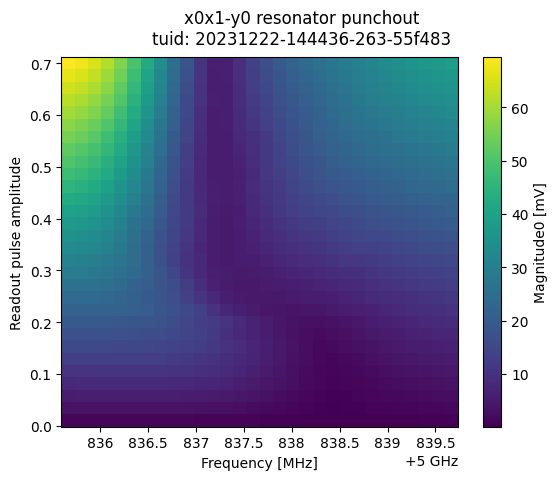

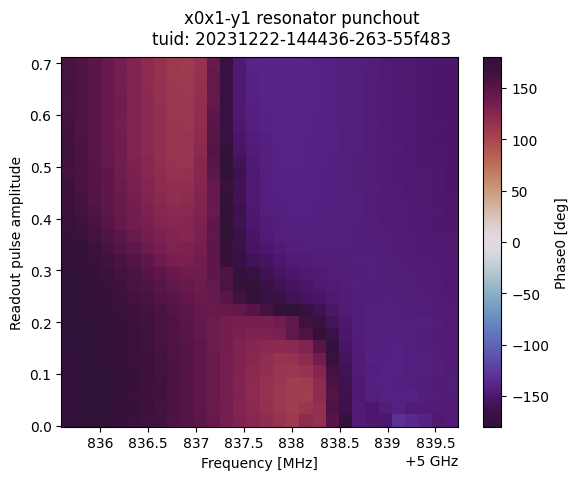

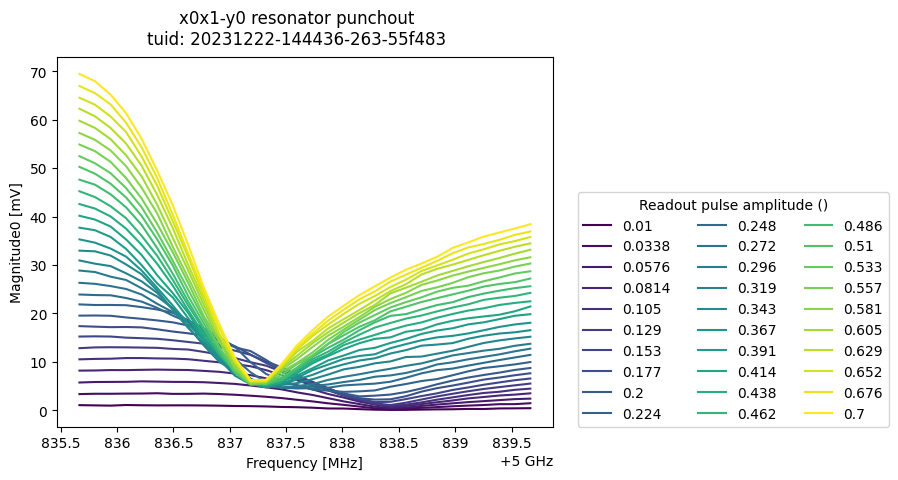

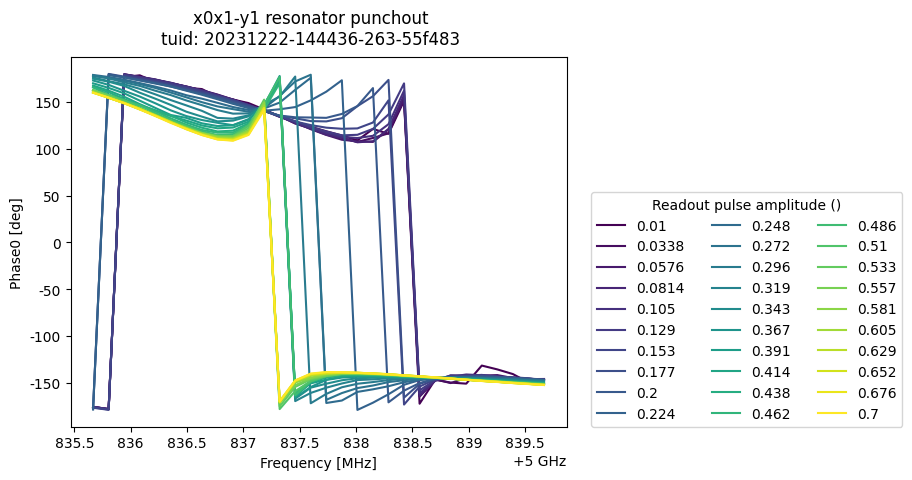

q4:


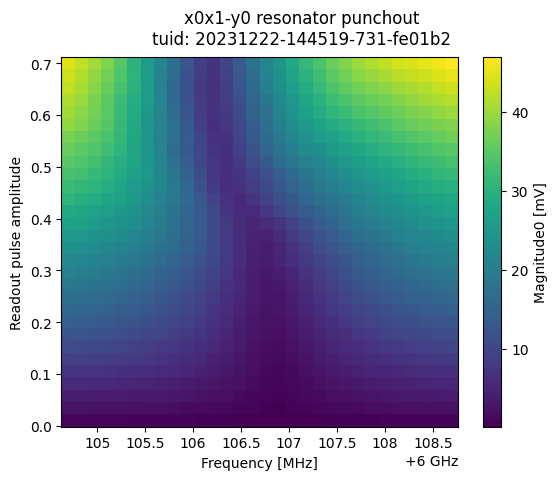

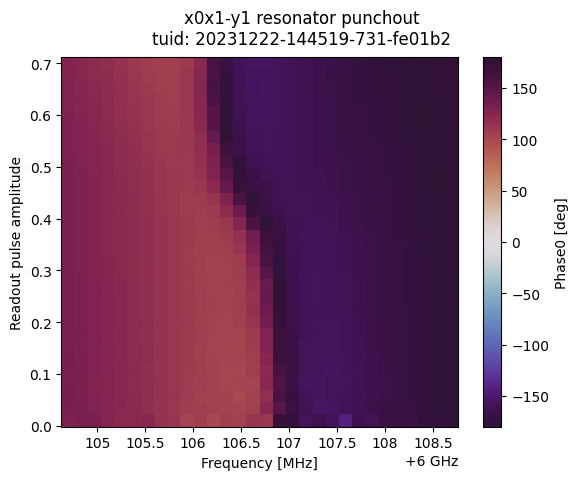

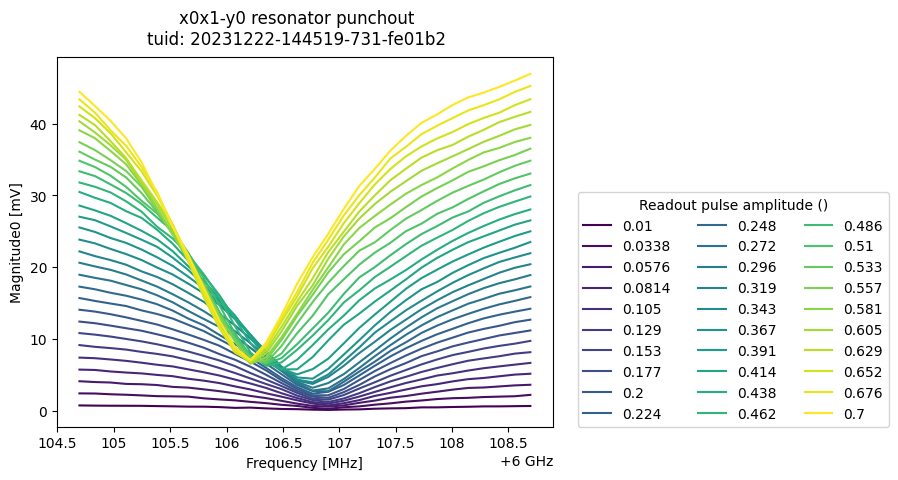

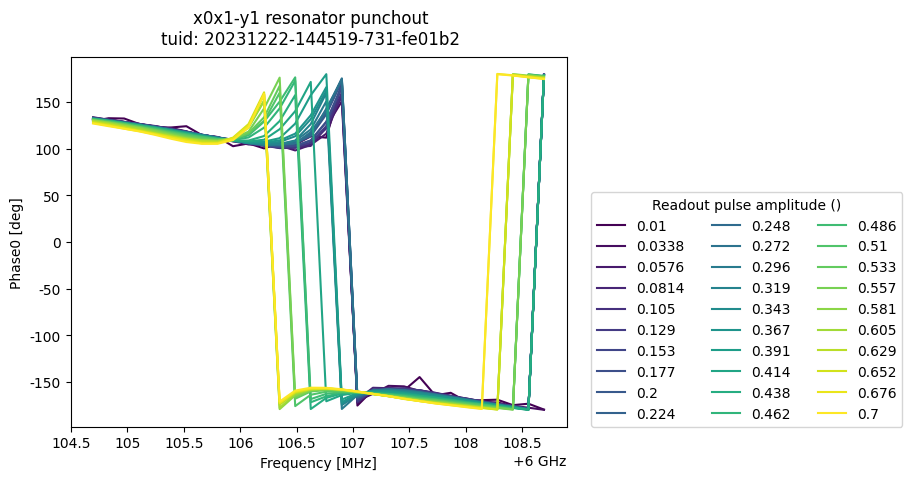

q5:


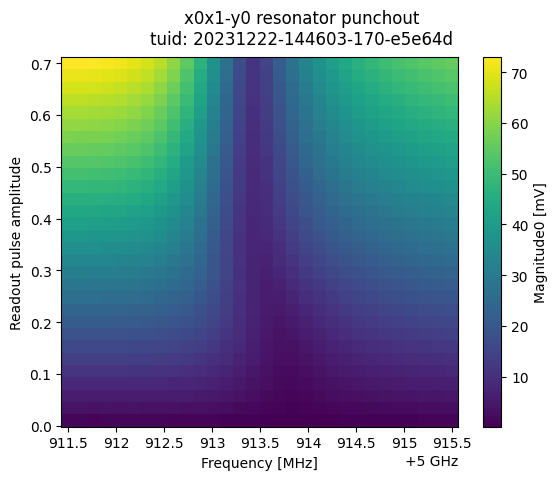

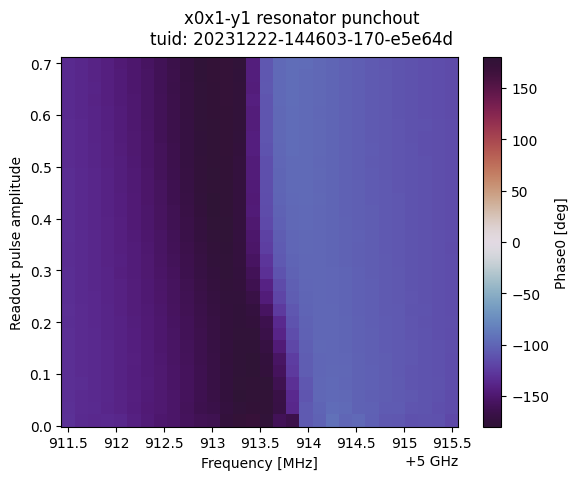

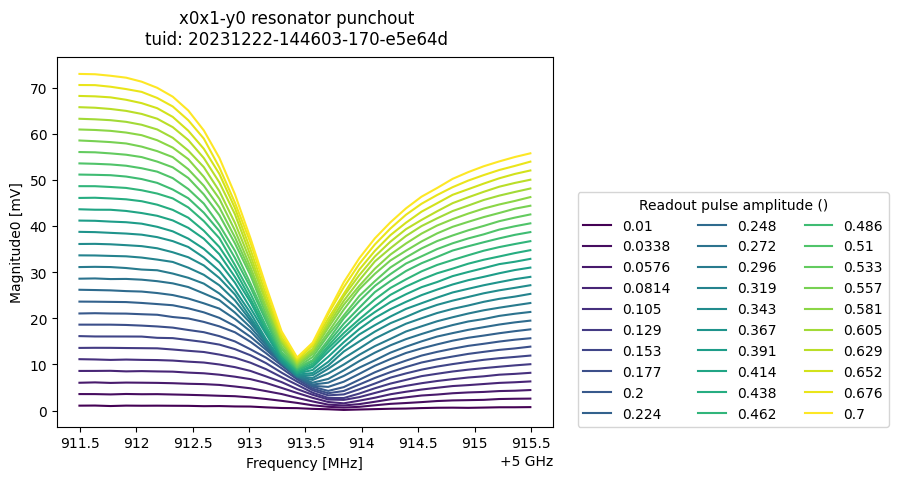

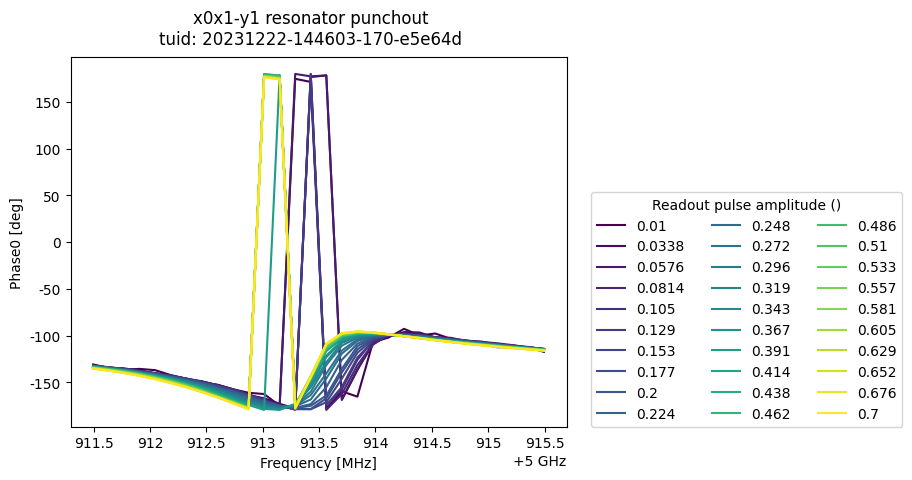

q1.measure
pulse_type                = SquarePulse
pulse_amp                 = 0.03
pulse_duration            = 2e-06
acq_channel               = 1
acq_delay                 = 8e-08
integration_time          = 1.5e-06
reset_clock_phase         = True
acq_weights_a             = None
acq_weights_b             = None
acq_weights_sampling_rate = None
acq_weight_type           = SSB
acq_rotation              = 0
acq_threshold             = 0

q1.reset
duration = 0.0001

q1.clock_freqs
readout = 5719800000.0
q2.measure
pulse_type                = SquarePulse
pulse_amp                 = 0.1
pulse_duration            = 2e-06
acq_channel               = 2
acq_delay                 = 8e-08
integration_time          = 1.5e-06
reset_clock_phase         = True
acq_weights_a             = None
acq_weights_b             = None
acq_weights_sampling_rate = None
acq_weight_type           = SSB
acq_rotation              = 0
acq_threshold             = 0

q2.reset
duration = 0.0001

q2.clock_freqs
readou

In [26]:
for q in PD_results:
    print(f"{q}:")
    PD_results[q].run().display_figs_mpl()

ans = [[5.7198e9,0.03],[6.0082e9,0.1],[5.8385e9,0.07],[6.1069e9,0.1],[5.9137e9,0.07]]
executor = True
if executor:
    for idx in range(5):
        qubit = quantum_device.get_element(ro_element[idx])
        qubit.measure.pulse_amp(ans[idx][-1])
        qubit.clock_freqs.readout(ans[idx][0])
        show_readout_args(qubit)
    executor = False

Flux dependent cavity
---
> Need to set output channel as a parameter

In [27]:
def FluxDep(quantum_device:QuantumDevice,ro_elements:list,ro_span_Hz:int=2e6,flux_span:float=0.3,n_avg:int=1000,flux_point:int=25,rof_point:int=25):
    analysis_result = {}
    for q in ro_elements:
        qubit = quantum_device.get_element(q)
        rof_center = qubit.clock_freqs.readout()  # Range ~4MHz
        rof_samples = linspace(rof_center-ro_span_Hz,rof_center+ro_span_Hz,rof_point)
        bias_samples = linspace(-flux_span,flux_span,flux_point)

        # declare variables
        freq = ManualParameter(name="freq", unit="Hz", label="Frequency")
        freq.batched = True
        freq.batch_size = 100

        # Requisition
        spec_sched_kwargs = dict(
            pulse_amp=qubit.measure.pulse_amp(),
            pulse_duration=qubit.measure.pulse_duration(),
            frequencies=freq,
            acquisition_delay=qubit.measure.acq_delay(),
            integration_time=qubit.measure.integration_time(),
            init_duration=qubit.reset.duration(),
            port=qubit.ports.readout(),
            clock=qubit.name + ".ro",
        )
        gettable = ScheduleGettable(
            quantum_device,
            schedule_function=heterodyne_spec_sched_nco,
            schedule_kwargs=spec_sched_kwargs,
            real_imag=False,
            batched=True,
        )
        show_args(spec_sched_kwargs, title="spec_sched_kwargs")

        # send the requisition to MeasurementControl-er
        quantum_device.cfg_sched_repetitions(n_avg)
        meas_ctrl.gettables(gettable)
        meas_ctrl.settables([freq, flux_settable_amp[q]]) 
        meas_ctrl.setpoints_grid((rof_samples, bias_samples))

        # MeasurementControl-er start measurement by the requisition
        rfs_ds = meas_ctrl.run("resonator flux spectroscopy")
        rfs_ds

        # analysis
        analysis_result[q] = ResonatorFluxSpectroscopyAnalysis(tuid=rfs_ds.attrs["tuid"], dataset=rfs_ds)
        
        # Feedback
        # qubit.clock_freqs.readout(rfs_analysis.quantities_of_interest["freq_0"])
        # flux_settable(rfs_analysis.quantities_of_interest["offset_0"].nominal_value)
    return analysis_result

FD_results = FluxDep(quantum_device,ro_element)

spec_sched_kwargs
pulse_amp         = 0.03
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 0.0001
port              = q1:res
clock             = q1.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 out0_offset 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = 0.1
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 0.0001
port              = q2:res
clock             = q2.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 out1_offset 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = 0.07
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 0.0001
port              = q3:res
clock             = q3.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 out2_offset 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = 0.1
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 0.0001
port              = q4:res
clock             = q4.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 out3_offset 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = 0.07
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 0.0001
port              = q5:res
clock             = q5.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 out0_offset 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

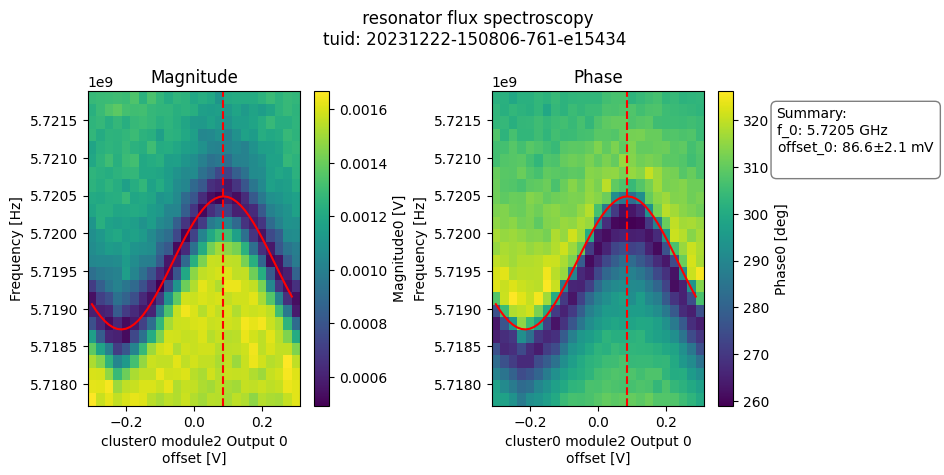

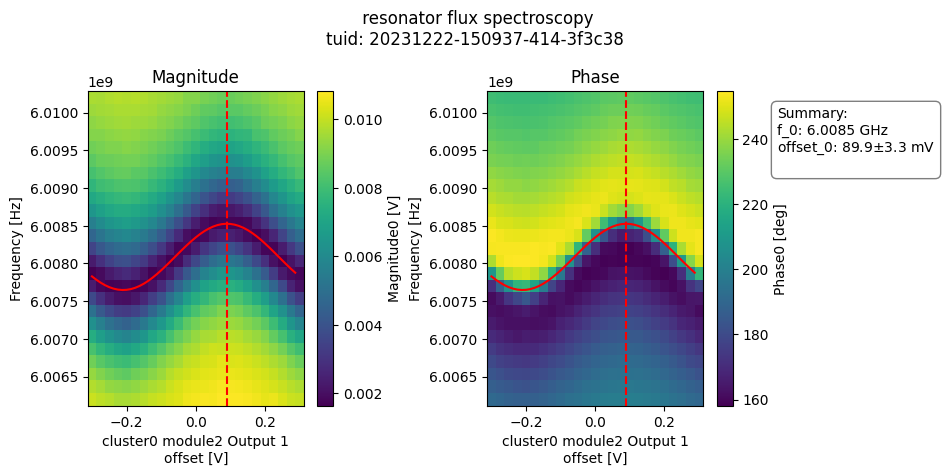

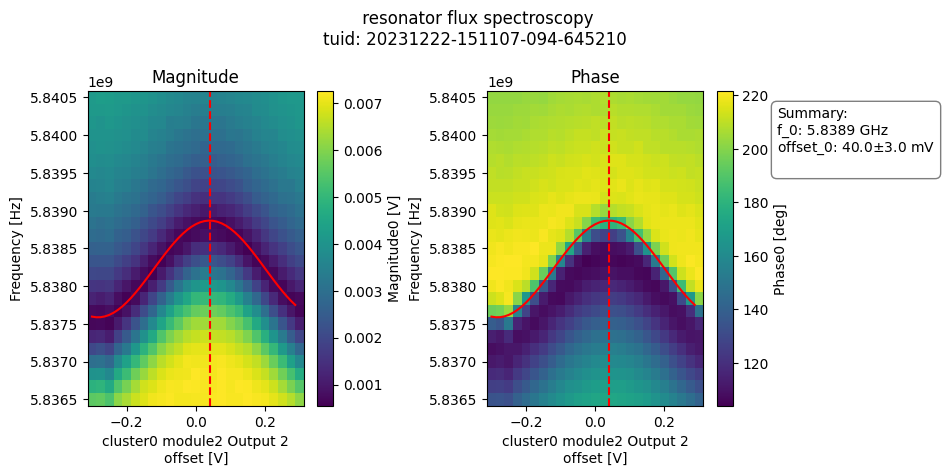

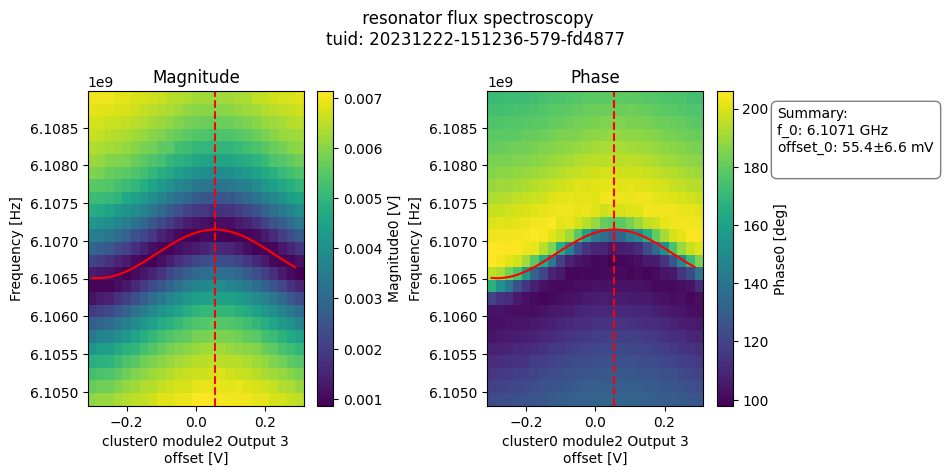

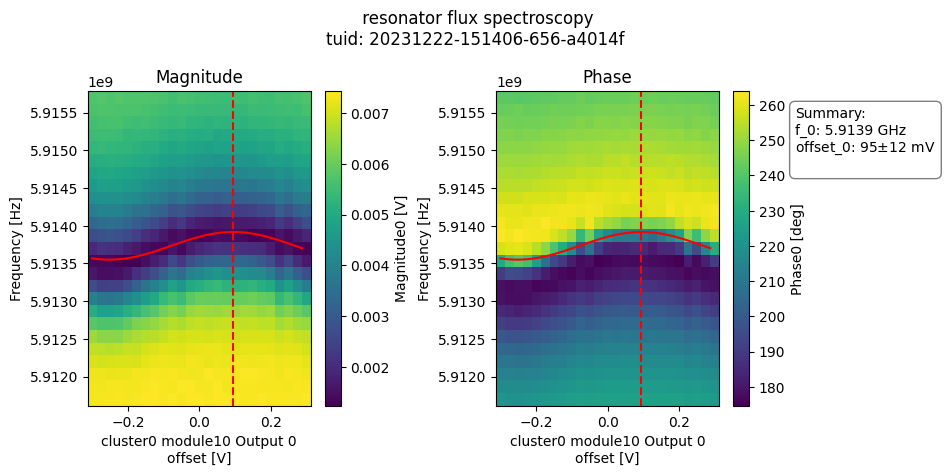

In [28]:
for q in FD_results:
    FD_results[q].run(fit_method="fast", sweetspot_index=0).display_figs_mpl()
executor = False
if executor:
    qubit.clock_freqs.readout(rfs_analysis.quantities_of_interest["freq_0"])
    flux_settable(rfs_analysis.quantities_of_interest["offset_0"].nominal_value)
    executor = False
    show_readout_args(qubit)

Two-tone
----

> Under construction


qubit_spec_sched_kwargs
qubit_name             = qubit
spec_pulse_amp         = 0.05
spec_pulse_duration    = 4.8e-05
spec_pulse_port        = qubit:mw
spec_pulse_clock       = qubit.01
spec_pulse_frequencies = freq
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 freq 
Batch size limit: 201



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

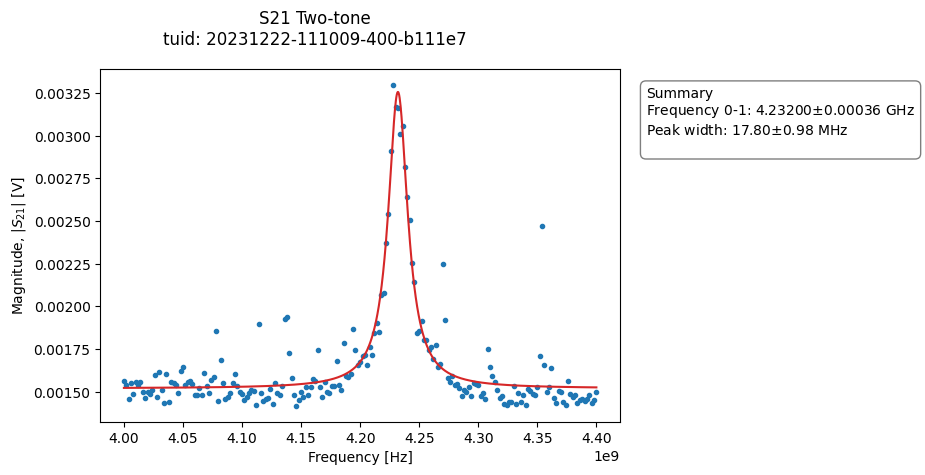

In [56]:

# ============= manually set Parameters =================
repeat_times = 1000
meas_freq = qubit.clock_freqs.readout()
xyf_center = 4.2e9
xyf_span = 200e6
xyf_resolutions = 2e6
xyw = 48e-6
# =========================================================
xyf_samples = arange(xyf_center-xyf_span,xyf_center+xyf_span+xyf_resolutions,xyf_resolutions)

# declare the variables
freq = ManualParameter(name="freq", unit="Hz", label="Frequency")
freq.batched = True

# Requisition
qubit_spec_sched_kwargs = dict(
    qubit_name=qubit.name,
    spec_pulse_amp=0.05,
    spec_pulse_duration=xyw,
    spec_pulse_port=qubit.ports.microwave(),
    spec_pulse_clock=qubit.name + ".01",
    spec_pulse_frequencies=freq    
)

gettable = ScheduleGettable(
    quantum_device,
    schedule_function=two_tone_spec_sched_nco,
    schedule_kwargs=qubit_spec_sched_kwargs,
    real_imag=False,
    batched=True,
)
show_args(qubit_spec_sched_kwargs, title="qubit_spec_sched_kwargs")

# send the requisition to MeasurementControl-er
quantum_device.cfg_sched_repetitions(repeat_times)
meas_ctrl.gettables(gettable)
meas_ctrl.settables(freq)
meas_ctrl.setpoints(xyf_samples)

# MeasurementControl-er start measurement by the requisition
qs_ds = meas_ctrl.run("Two-tone")
qs_ds

# analysis
qs_analysis = QubitSpectroscopyAnalysis(tuid=qs_ds.attrs["tuid"], dataset=qs_ds)
qs_analysis.run().display_figs_mpl()

# Feedback
# qubit.clock_freqs.f01(qs_analysis.quantities_of_interest['frequency_01'].nominal_value)

In [57]:
executor = True
if executor :
    qubit.clock_freqs.f01(qs_analysis.quantities_of_interest['frequency_01'].nominal_value)
    executor = False
show_drive_args(qubit)

qubit.rxy
amp180   = nan
motzoi   = 0
duration = 2e-08

qubit.clock_freqs
f01 = 4231997697.586551


## power Rabi oscillation


rabi_sched_kwargs
pulse_amp      = pulse_amplitude
pulse_duration = 2e-08
frequency      = 4228303321.7035923
qubit          = qubit
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 pulse_amplitude 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

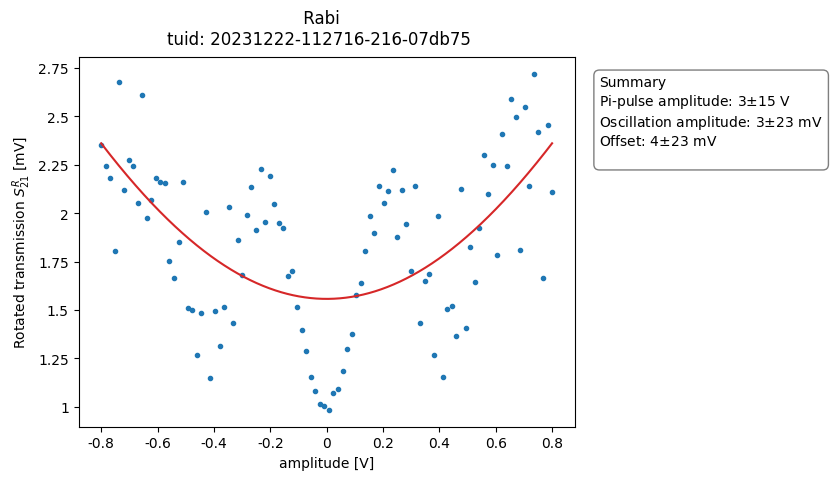

In [74]:

# ============= manually set Parameters =================
repeat_times = 8000
end_XYL = 0.8
fitpoint_num = 100
# ====================================================
xyl_samples = np.linspace(-end_XYL, end_XYL, fitpoint_num)

# declare the variables
ctrl_pulse_amp = ManualParameter(name="pulse_amplitude", unit="V", label="amplitude")
ctrl_pulse_amp.batched = True

# Requisition
rabi_sched_kwargs = {
    "pulse_amp": ctrl_pulse_amp,
    "pulse_duration": qubit.rxy.duration(),
    "frequency": qubit.clock_freqs.f01(),
    "qubit": qubit.name,
}
gettable = ScheduleGettable(
    quantum_device,
    schedule_function=rabi_sched,
    schedule_kwargs=rabi_sched_kwargs,
    batched=True,
)
show_args(rabi_sched_kwargs, title="rabi_sched_kwargs")

# send the requisition to MeasurementControl-er
quantum_device.cfg_sched_repetitions(repeat_times)
meas_ctrl.gettables(gettable)
meas_ctrl.settables(ctrl_pulse_amp)
meas_ctrl.setpoints(xyl_samples)

# MeasurementControl-er start measurement by the requisition
rabi_ds = meas_ctrl.run("Rabi")
rabi_ds

# Analysis
rabi_analysis = RabiAnalysis(tuid=rabi_ds.attrs["tuid"], dataset=rabi_ds)
rabi_analysis.run().display_figs_mpl()

# Feedback
# qubit.rxy.amp180(rabi_analysis.quantities_of_interest["Pi-pulse amplitude"].nominal_value)

In [59]:
executor = True
if executor:
    qubit.rxy.amp180(rabi_analysis.quantities_of_interest["Pi-pulse amplitude"].nominal_value)
    executor = False
show_drive_args(qubit)

qubit.rxy
amp180   = 0.22644789709267713
motzoi   = 0
duration = 2e-08

qubit.clock_freqs
f01 = 4231997697.586551


## Time Rabi

rabi_sched_kwargs
pulse_amp      = 0.22644789709267713
pulse_duration = pulse_duration
frequency      = 4228503321.7035923
qubit          = qubit
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 pulse_duration 
Batch size limit: 25



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

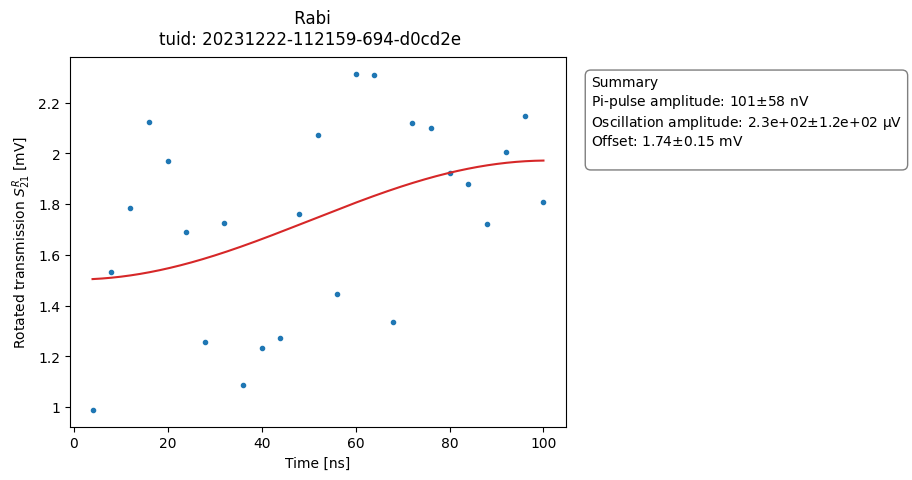

In [69]:
# ============= manually set Parameters =================
repeat_times = 8000
end_xyw = 100e-9
start_xyw = 4e-9
xyw_resolutions = 4e-9
# ====================================================
xyw_samples = arange(start_xyw, end_xyw+xyw_resolutions, xyw_resolutions)

# declare the variables
ctrl_pulse_dura = ManualParameter(name="pulse_duration", unit="s", label="Time")
ctrl_pulse_dura.batched = True

# Requisition
rabi_sched_kwargs = {
    "pulse_amp": qubit.rxy.amp180(),
    "pulse_duration": ctrl_pulse_dura,
    "frequency": qubit.clock_freqs.f01(),
    "qubit": qubit.name,
}
gettable = ScheduleGettable(
    quantum_device,
    schedule_function=rabi_sched,
    schedule_kwargs=rabi_sched_kwargs,
    batched=True,
)
show_args(rabi_sched_kwargs, title="rabi_sched_kwargs")

# send the requisition to MeasurementControl-er
quantum_device.cfg_sched_repetitions(repeat_times)
meas_ctrl.gettables(gettable)
meas_ctrl.settables(ctrl_pulse_dura)
meas_ctrl.setpoints(xyw_samples)

# MeasurementControl-er start measurement by the requisition
rabi_ds = meas_ctrl.run("Rabi")
rabi_ds

# Analysis
rabi_analysis = RabiAnalysis(tuid=rabi_ds.attrs["tuid"], dataset=rabi_ds)
rabi_analysis.run().display_figs_mpl()

# Feedback
# qubit.rxy.amp180(rabi_analysis.quantities_of_interest["Pi-pulse amplitude"].nominal_value)

## Ramsey

ramsey_sched_kwargs
qubit               = qubit
times               = tau
artificial_detuning = -200000.0
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau 
Batch size limit: 51



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

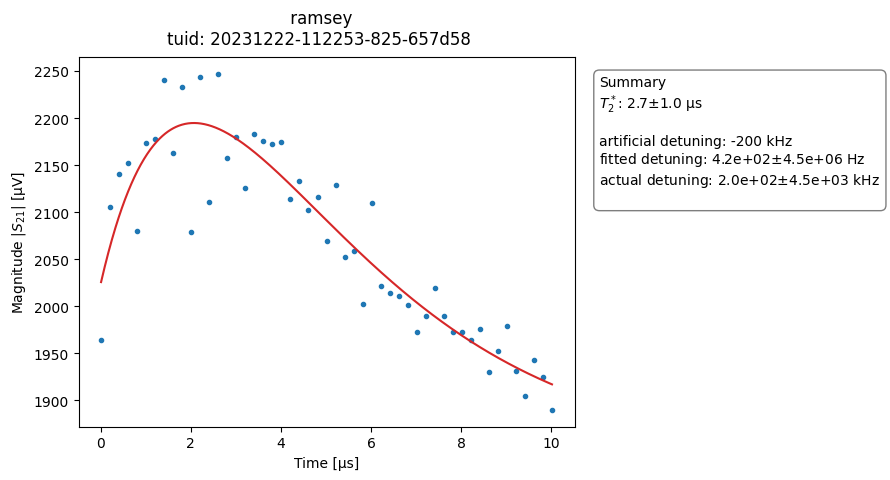

In [70]:

# ============= manually set parameters ===================
repeat_times = 8000
revo_start_time = 12e-9
revo_end_time = 10e-6
virtual_detune = -0.2e6
revo_resolutions = 200e-9
# =========================================================
revo_samples = arange(revo_start_time, revo_end_time+revo_resolutions, revo_resolutions)

# declare variables
tau = ManualParameter(name="tau", unit="s", label="Time")
tau.batched = True

# Requisition
ramsey_sched_kwargs = {
    "qubit": qubit.name,
    "times": tau,
    "artificial_detuning": virtual_detune,
}
gettable = ScheduleGettable(
    quantum_device,
    schedule_function=ramsey_sched,
    schedule_kwargs=ramsey_sched_kwargs,
    real_imag=False,
    batched=True,
)
show_args(ramsey_sched_kwargs, title="ramsey_sched_kwargs")

# send the requisition to MeasurementControl-er
quantum_device.cfg_sched_repetitions(repeat_times)
meas_ctrl.gettables(gettable)
meas_ctrl.settables(tau)
meas_ctrl.setpoints(revo_samples)

# MeasurementControl-er start measurement by the requisition
ramsey_ds = meas_ctrl.run("ramsey")
ramsey_ds

# Analysis
ramsey_analysis = RamseyAnalysis(tuid=ramsey_ds.attrs["tuid"], dataset=ramsey_ds)
ramsey_analysis.run(
    artificial_detuning=ramsey_sched_kwargs["artificial_detuning"]
).display_figs_mpl()

# Feedback
# qubit.clock_freqs.f01(qubit.clock_freqs.f01()+ramsey_analysis.quantities_of_interest['detuning'].nominal_value)

In [71]:
executor = True
if executor:
    qubit.clock_freqs.f01(qubit.clock_freqs.f01()-0.2e6)
    executor = False
show_drive_args(qubit)

qubit.rxy
amp180   = 0.22644789709267713
motzoi   = 0
duration = 2e-08

qubit.clock_freqs
f01 = 4228303321.7035923


## T1

t1_sched_kwargs
qubit = qubit
times = tau_delay
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 31



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

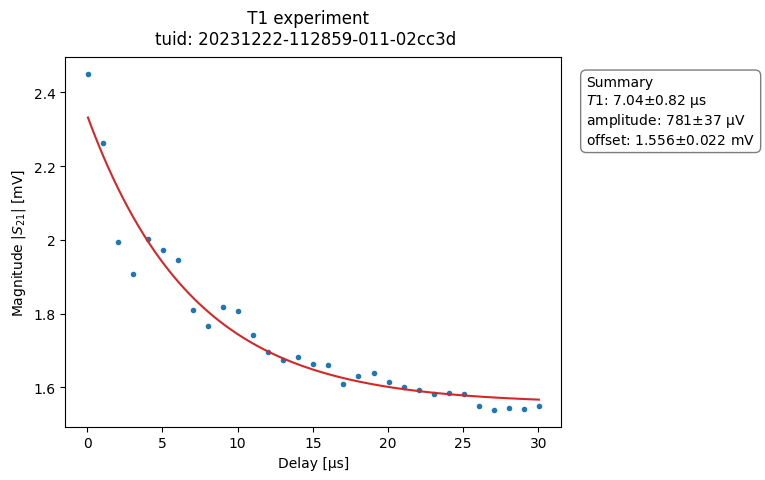

In [75]:

# ============= manually set parameters ===================
repeat_times = 8000
exp_times = 1
relax_start_time = 40e-9
relax_end_time = 30e-6
relax_resolutions = 1e-6
# =========================================================
relax_samples = arange(relax_start_time, relax_end_time+relax_resolutions, relax_resolutions)

# declare variables
tau = ManualParameter(name="tau_delay", unit="s", label="Delay")
tau.batched = True

# Requisition
t1_sched_kwargs = {
    "qubit": qubit.name, 
    "times": tau
}
gettable = ScheduleGettable(
    quantum_device,
    schedule_function=t1_sched,
    schedule_kwargs=t1_sched_kwargs,
    real_imag=False,
    batched=True,
)
show_args(t1_sched_kwargs, title="t1_sched_kwargs")

# send the requisition to MeasurementControl-er
quantum_device.cfg_sched_repetitions(repeat_times)
meas_ctrl.gettables(gettable)
meas_ctrl.settables(tau)
meas_ctrl.setpoints(relax_samples)

# MeasurementControl-er start measurement by the requisition
T1_rec = []
for i in range(exp_times):
    T1_ds = meas_ctrl.run("T1 experiment")
    T1_ds

    # Analysis
    t1_analysis = T1Analysis(tuid=T1_ds.attrs["tuid"], dataset=T1_ds)
    t1_analysis.run().display_figs_mpl()
    T1_rec.append(t1_analysis.quantities_of_interest['T1'].nominal_value)
# Feedback
# T1 = t1_analysis.quantities_of_interest['T1'].nominal_value

In [121]:
from numpy import average, std, array
print(f"T1 ={average(array(T1_rec))} 土 {std(array(T1_rec))}")

T1 =5.605348833559453e-06 土 4.886399318918312e-07


In [122]:
Instrument.close_all()
